## Pytorch Practice


In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)
torch.manual_seed(42)

2.1.0+cu118


## Data Preparation and Loading

In [2]:
# Create the data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
# Create a train and test split
train_split = int(0.8 *len(X))

X_train,X_test = X[:train_split],X[:train_split:]
y_train,y_test = y[:train_split],y[:train_split:]

## Building the model

In [4]:
# Create the linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)

  def forward(self, x: torch.Tensor):
    return self.weights * x + self.bias

In [5]:
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [6]:
with torch.inference_mode():
  y_preds = model_0(X_test)

## 3. Training model
1. Creating loss function and optimizer

In [8]:
loss_fn = nn.L1Loss()
optim_fn = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

In [12]:
torch.manual_seed(42)

epochs=200

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### Training
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred,y_train)

  optim_fn.zero_grad()

  loss.backward()

  optim_fn.step()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    #2. Calculate loss on the test data
    test_loss = loss_fn(test_pred, y_test)

    # Print out what is happening.

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.024110013619065285 
Epoch: 10 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss: 0.020677709951996803 
Epoch: 20 | MAE Train Loss: 0.01758546568453312 | MAE Test Loss: 0.017245199531316757 
Epoch: 30 | MAE Train Loss: 0.014155393466353416 | MAE Test Loss: 0.013806397095322609 
Epoch: 40 | MAE Train Loss: 0.010716589167714119 | MAE Test Loss: 0.010375778190791607 
Epoch: 50 | MAE Train Loss: 0.0072835334576666355 | MAE Test Loss: 0.006941580679267645 
Epoch: 60 | MAE Train Loss: 0.0038517764769494534 | MAE Test Loss: 0.0035027749836444855 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.0025885067880153656 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.0025885067880153656 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.0025885067880153656 
Epoch: 100 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.0025885067880153656 
Epoch: 110 | MAE Train Los

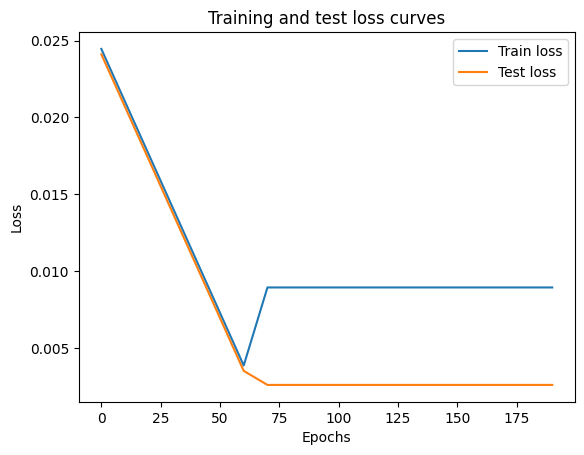

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [15]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.3093],
        [0.3233],
        [0.3373],
        [0.3513],
        [0.3652],
        [0.3792],
        [0.3932],
        [0.4072],
        [0.4212],
        [0.4351],
        [0.4491],
        [0.4631],
        [0.4771],
        [0.4911],
        [0.5050],
        [0.5190],
        [0.5330],
        [0.5470],
        [0.5610],
        [0.5749],
        [0.5889],
        [0.6029],
        [0.6169],
        [0.6309],
        [0.6448],
        [0.6588],
        [0.6728],
        [0.6868],
        [0.7008],
        [0.7147],
        [0.7287],
        [0.7427],
        [0.7567],
        [0.7707],
        [0.7847],
        [0.7986],
        [0.8126],
        [0.8266],
        [0.8406],
        [0.8546]])

# Pytorch Computer Vision

In [17]:
# Import pytorh
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#Import matplotlib for Visualization
import matplotlib.pyplot as plt

print(torch.__version__, torchvision.__version__)

2.1.0+cu118 0.16.0+cu118


In [18]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


100%|██████████| 26421880/26421880 [00:01<00:00, 13957947.20it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 265022.98it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4982376.83it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10796138.50it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [20]:
# See first training sample
# image, label = train_data[0]
# image, label

In [21]:
image.shape

torch.Size([1, 28, 28])

In [24]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


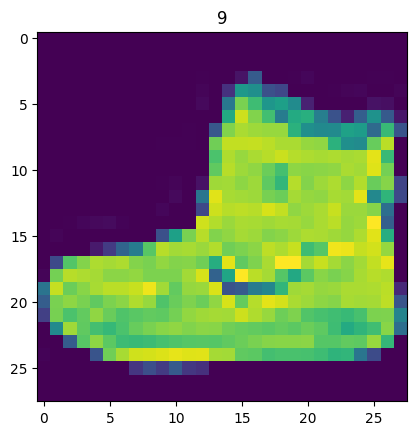

In [25]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

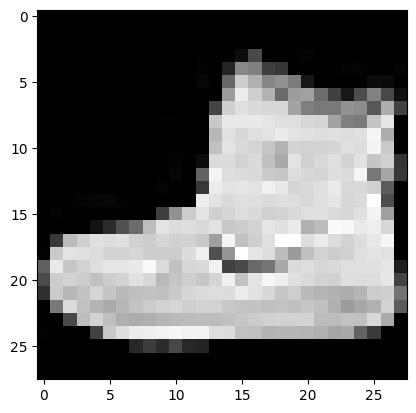

In [27]:
plt.imshow(image.squeeze(), cmap="gray")